# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
# %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(20)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


## Deliverable 1: Get a Summary DataFrame 

In [16]:
pyber_data_df.value_counts('city')

city
West Angela        39
South Karenland    38
North Jason        35
Liumouth           33
Port Frank         33
                   ..
Randallchester      5
Penaborough         5
South Saramouth     4
Newtonview          4
Garzaport           3
Length: 120, dtype: int64

In [4]:
#  1. Get the total rides for each city type
rides = pyber_data_df.groupby(['type']).count()['ride_id']
rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [55]:
# 2. Get the total drivers for each city type
unique_cities = pyber_data_df.drop_duplicates(subset = ["city"])

# pd.unique(pyber_data_df[pyber_data_df['city'] == unique_cities]['driver_count']).tolist()

# pyber_data_df.loc[pyber_data_df.cityunique_citiesunique_cities].drop_duplicates()
drivers = unique_cities.groupby(['type']).sum()['driver_count']
drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
fares = pyber_data_df.groupby(['type']).sum()['fare']
fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [59]:
#  4. Get the average fare per ride for each city type. 
avg_fare = fares / rides
avg_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [60]:
# 5. Get the average fare per driver for each city type. 
#  4. Get the average fare per ride for each city type. 
avg_wage = fares / drivers
avg_wage

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [61]:
#  6. Create a PyBer summary DataFrame. 
city_summary = pd.DataFrame()

city_summary["Total Rides"] = rides
city_summary["Total Drivers"] = drivers
city_summary["Total Fare"] = fares
city_summary["Avg Fare per Ride"] = avg_fare
city_summary["Avg Fare per Driver"] = avg_wage


city_summary

,Total Rides,Total Drivers,Total Fare,Avg Fare per Ride,Avg Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [62]:
#  7. Cleaning up the DataFrame. Delete the index name
city_summary.index.name = None

In [63]:
#  8. Format the columns.
city_summary["Total Rides"] = city_summary["Total Rides"].map("{:,}".format)
city_summary["Total Drivers"] = city_summary["Total Drivers"].map("{:,}".format)
city_summary["Total Fare"] = city_summary["Total Fare"].map("${:,.2f}".format)
city_summary["Avg Fare per Ride"] = city_summary["Avg Fare per Ride"].map("${:.2f}".format)
city_summary["Avg Fare per Driver"] = city_summary["Avg Fare per Driver"].map("${:.2f}".format)
city_summary

,Total Rides,Total Drivers,Total Fare,Avg Fare per Ride,Avg Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [4]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [8]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df = pyber_data_df[['date', 'type', 'fare']]


city_fare = df.groupby(['type', 'date']).sum()['fare']
city_fare

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [9]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
city_fare = city_fare.reset_index()


In [13]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
table = pd.pivot(city_fare, index='date', columns='type', values='fare')
table.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [18]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

weekly_fare = table.loc['2019-01-01':'2019-04-29']
weekly_fare

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [21]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
weekly_fare.index = pd.to_datetime(weekly_fare.index)

In [22]:
# 7. Check that the datatype for the index is datetime using df.info()
weekly_fare.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [23]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
week_on_week = weekly_fare.resample('W', convention='start').sum()
week_on_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [24]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')



In [32]:
week_on_week['Rural'].values

array([187.92,  67.65, 306.  , 179.69, 333.08, 115.8 ,  95.82, 419.06,
       175.14, 303.94, 163.39, 189.76, 199.42, 501.24, 269.79, 214.14,
       191.85])

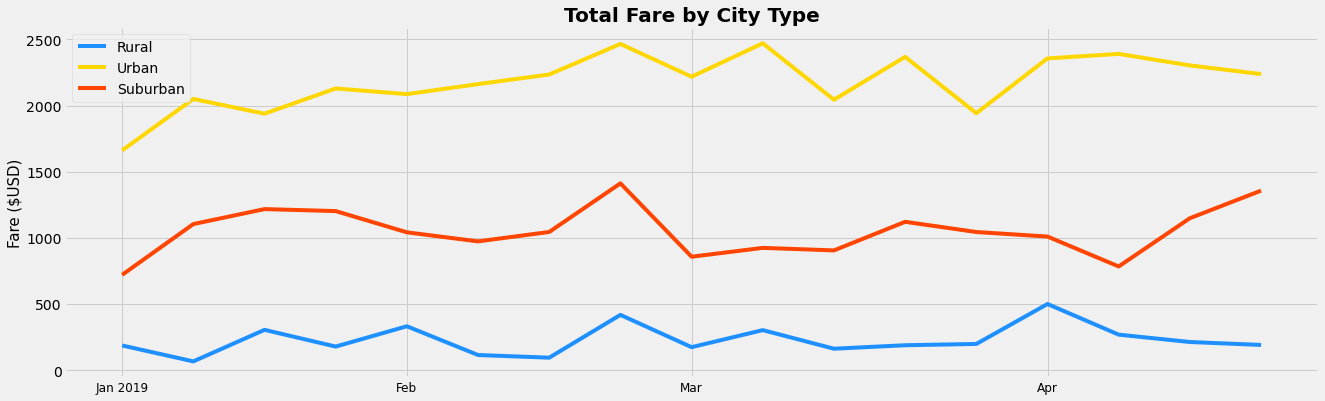

In [62]:
plt.figure(figsize=(20,6))

rural = week_on_week['Rural'].values
urban = week_on_week['Urban'].values
suburban = week_on_week['Suburban'].values

x = week_on_week.index.values
y = (rural, urban, suburban)

plt.plot(x, rural, color='dodgerblue', label='Rural')
plt.plot(x, urban, color='gold', label='Urban')
plt.plot(x, suburban, color='orangered', label='Suburban')

# fig, ax = plt

# plt.scatter(x, y, color="deeppink", s=300, edgecolor="black", linewidths=1)

# Give our graph axis labels
# plt.xlabel("Temp (f)", fontsize=15,) #fontweight='bold'))
plt.ylabel("Fare ($USD)", fontsize=15,) #fontweight='bold')
plt.title("Total Fare by City Type", fontsize=20, fontweight='bold')
# plt.grid(color="paleturquoise", linewidth=.5, alpha=.5)#axis="y", 

# ax.set
# xtic= ('Jan', 'Feb', 'Mar', 'Apr')
plt.xticks(['2019-01-06', '2019-02-03', '2019-03-03', '2019-04-07'], ['Jan 2019', 'Feb', 'Mar', 'Apr'],fontsize=12)
# plt.yticks(fontsize=12)
# plt.ylim(100,700)
# plt.xlim(10,28)

plt.legend()

plt.savefig("Pyber_Fare_Summary.png")

plt.show()

